A [[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]


Text(0.5, 1.0, 'mononom')

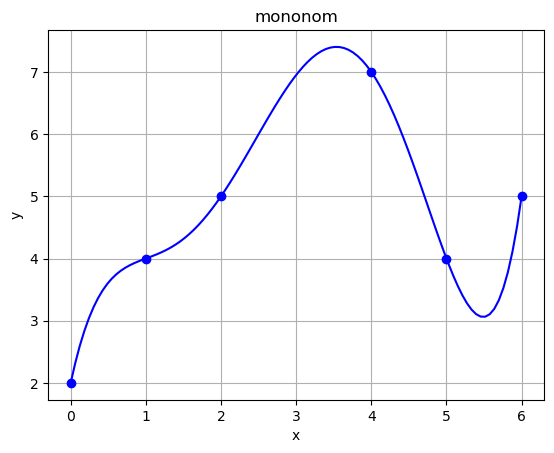

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def base(name,X,n,x):
  
  N =len(X)
  if name == 'mononom':
    B=np.power(x,n);

  elif name == 'Lagrange':
    B=np.ones(x.shape, dtype=float)
    for i in range (N):
      if i != n: B=B*(x-X[i])/(X[n]-X[i])
  
  elif name == 'Cebysev':
    a=X[0];b=X[len(X)-1]
    x=2*x/(b-a)-(b+a)/(b-a)
    T=np.zeros((N,len(x)),dtype=float);
    T[0,:]=np.ones(x.size,dtype=float); 
    if n == 0: B=T[0,:]; return B  
    T[1,:]=x;
    if n == 1: B=T[1,:]; return B
    for i in range (1,n): T[i+1,:]=2*x*T[i,:]-T[i-1,:];
    B=T[n,:];

  elif name ==  'Newton':
     T=np.zeros((N,len(x)),dtype=float);
     T[0,:]=np.ones(x.size,dtype=float)
     for i in range (0,n): T[i+1,i+1:len(x)]=  T[i,i+1:len(x)]*(x[i+1:len(x)]-X[i]);
     B=T[n,:]  

  return B

fig=plt.figure(1); ax=fig.add_subplot(1, 1, 1);ax.set_xlabel('x');ax.set_ylabel('y');ax.grid()
X=np.array([0, 1, 2, 4, 5, 6]);Y=np.array([2,4,5,7,4,5]) ###############################################
plt.plot(X,Y,'bo')
N=len(X)
A=np.zeros((N,N),dtype=float)
#######################################################3
# name='mononom' 
#name='Lagrange'
#name='Cebysev'
# name='Newton'
for i in range (N) :
  A[:,i]=base(name,X,i,X)
print('A',A)
coeff=np.linalg.solve(A,Y)  

xxx=np.linspace(X[0],X[N-1],100)
yyy=np.zeros(xxx.size,dtype=float)
for i in range (N):  yyy+=base(name,X,i,xxx)*coeff[i]
plt.plot(xxx,yyy,'b-')
ax.set_title(name);